In [3]:
import numpy as np
import pandas as pd
import yfinance as yf 

import math
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import QuantileRegressor


In [4]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^GDAXI")

[*********************100%***********************]  1 of 1 completed


In [5]:
# Data Import 

In [6]:
data_close = data['Close']

#Roling Window 1000 Steps
data_roling = data_close[-1000:]
data_roling = data_close['1991-11-07':]

#Expanding Window startig at 2017-11-07
data_extending = data_close['2017-11-07':]


Date
1987-12-30     1005.190002
1988-01-04      956.489990
1988-01-05      996.099976
1988-01-06     1006.010010
1988-01-07     1014.469971
                  ...     
2021-10-18    15474.469727
2021-10-19    15515.830078
2021-10-20    15522.919922
2021-10-21    15472.559570
2021-10-22    15542.980469
Name: Close, Length: 8542, dtype: float64


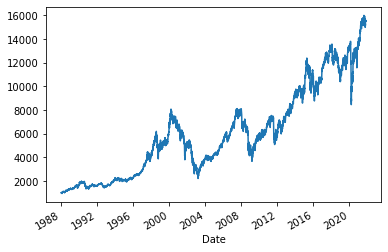

In [7]:
print(data_close)

data_close.plot()

In [8]:
#Return Function
def compute_return(y, h):
    n = len(y)
    y2 = y[h] # exclude first h observations
    y1 = y[0] # exclude last h observations # compute h-step cumulative returns
    
    return 100*(math.log(y2)-math.log(y1))



In [9]:
data_roling

Date
1991-11-07     1582.060059
1991-11-08     1610.180054
1991-11-11     1605.160034
1991-11-12     1623.839966
1991-11-13     1615.260010
                  ...     
2021-10-18    15474.469727
2021-10-19    15515.830078
2021-10-20    15522.919922
2021-10-21    15472.559570
2021-10-22    15542.980469
Name: Close, Length: 7578, dtype: float64

In [10]:
returns_1 = []
returns_2 = []
returns_3 = []
returns_4 = []
returns_5 = []



for i in range(1,(len(data_roling)-6)):
        
        returns1 = compute_return(data_roling[i:i+6], 1)
        returns2 = compute_return(data_roling[i:i+6], 2)
        returns3 = compute_return(data_roling[i:i+6], 3)
        returns4 = compute_return(data_roling[i:i+6], 4)
        returns5 = compute_return(data_roling[i:i+6], 5)
        
        dates = data_roling
        returns_1.append(returns1)
        returns_2.append(returns2)
        returns_3.append(returns3)
        returns_4.append(returns4)
        returns_5.append(returns5)
        
  



A = np.array([ 
               returns_1, 
               returns_2,
               returns_3,
               returns_4,
               returns_5,])
print(A)

[[-0.3122546   1.15702323 -0.52977532 ...  0.67449211  1.38931091
   0.80284041]
 [ 0.84476863  0.62724791  0.19932766 ...  2.06380302  2.19215132
   0.07596036]
 [ 0.31499331  1.35635089  0.19256775 ...  2.86664343  1.46527127
   0.34288502]
 [ 1.04409629  1.34959098 -1.12339255 ...  2.13976338  1.73219593
   0.38856885]
 [ 1.03733639  0.03363068 -2.12484052 ...  2.40668804  1.77787976
   0.06361568]]


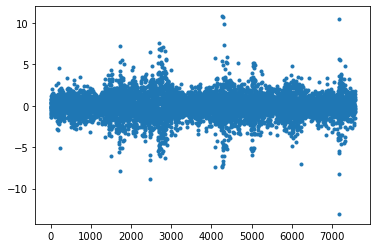

In [11]:
plt.plot(A[0], '.')
plt.show()

In [12]:
data_roling

Date
1991-11-07     1582.060059
1991-11-08     1610.180054
1991-11-11     1605.160034
1991-11-12     1623.839966
1991-11-13     1615.260010
                  ...     
2021-10-18    15474.469727
2021-10-19    15515.830078
2021-10-20    15522.919922
2021-10-21    15472.559570
2021-10-22    15542.980469
Name: Close, Length: 7578, dtype: float64

In [13]:
tau = [2.5, 25, 50, 75, 97.5]

pred_baseline = []

df = pd.DataFrame()

for i in range(0,5) : 
    
    for j in range(0,5): 
        pred_baseline.append(np.percentile(A[i], tau[j]))
        
      

  
  
print(pred_baseline)    
    
pred_baseline = pred_baseline    
x = np.reshape(pred_baseline, (5, 5))

print(x)
pred_baseline = x

[-2.938866472014867, -0.6203827477669677, 0.08346467844999594, 0.7385954587689092, 2.7410086401449707, -4.32354793919596, -0.9127476677154966, 0.15609068928839065, 1.115226755871923, 3.839518052181967, -5.255931496947319, -1.0672104646499925, 0.24113470645374946, 1.418708632334642, 4.561335861120686, -5.856052825009028, -1.223231720872242, 0.2859527797387962, 1.6497172618277212, 5.206527026715468, -6.497053735192226, -1.3560369602477085, 0.376113892079033, 1.8997823626831334, 5.7215129312152335]
[[-2.93886647 -0.62038275  0.08346468  0.73859546  2.74100864]
 [-4.32354794 -0.91274767  0.15609069  1.11522676  3.83951805]
 [-5.2559315  -1.06721046  0.24113471  1.41870863  4.56133586]
 [-5.85605283 -1.22323172  0.28595278  1.64971726  5.20652703]
 [-6.49705374 -1.35603696  0.37611389  1.89978236  5.72151293]]


In [57]:
#quantile Regression 
#Change
predictions_h = {}
for h in range(1,6):
    y_true_mean = 0 #by definition of daily returns 
    X =  abs(A[0].take(len(A[0])-1)).reshape(-1, 1)
    X_train = A[0][-(1000+h):-h].reshape(-1, 1)  # last 1000 daily returns
    y_train = A[h-1][-1000:] # followed h- step return


    quantiles = [i/100 for i in tau]
    predictions = {}
    out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0).fit(X_train, y_train)
        y_pred = qr.predict(X)
        predictions[quantile] = y_pred

        if quantile == min(quantiles):
            out_bounds_predictions = np.logical_or(
                out_bounds_predictions, y_pred >= y_train
            )
        elif quantile == max(quantiles):
            out_bounds_predictions = np.logical_or(
                out_bounds_predictions, y_pred <= y_train
            )
    predictions_h[h] = predictions       

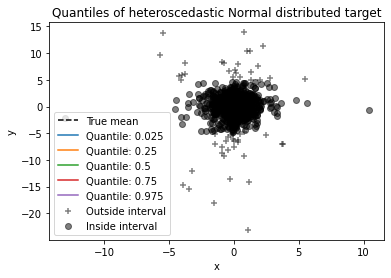

In [58]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    X_train[out_bounds_predictions],
    y_train[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    X_train[~out_bounds_predictions],
    y_train[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

In [76]:
print(predictions_h)

pred_results = pd.DataFrame.from_dict(predictions_h)
print(pred_results)


{1: {0.025: array([-2.53749866]), 0.25: array([-0.48113718]), 0.5: array([0.02436273]), 0.75: array([0.60615091]), 0.975: array([2.2538531])}, 2: {0.025: array([-3.89195844]), 0.25: array([-0.67437491]), 0.5: array([0.1399748]), 0.75: array([0.9135493]), 0.975: array([3.12154847])}, 3: {0.025: array([-4.45701105]), 0.25: array([-0.8294579]), 0.5: array([0.10222922]), 0.75: array([1.11245745]), 0.975: array([4.0297898])}, 4: {0.025: array([-4.81995797]), 0.25: array([-0.90750497]), 0.5: array([0.16190355]), 0.75: array([1.29645161]), 0.975: array([4.72807949])}}
                           1                      2                      3  \
0.025  [-2.5374986583838273]  [-3.8919584366017315]  [-4.4570110539203975]   
0.250  [-0.4811371765721709]  [-0.6743749141437344]  [-0.8294578950262674]   
0.500  [0.02436272900093956]  [0.13997479540903943]  [0.10222922023518438]   
0.750   [0.6061509051548495]   [0.9135492990895744]   [1.1124574524265076]   
0.975   [2.2538530976882187]   [3.12154846

In [56]:
print(quantiles)

quantiles = [i/100 for i in tau]

print(tau)
print(quantiles)

[2.5, 25, 50, 75, 97.5]
[2.5, 25, 50, 75, 97.5]
[0.025, 0.25, 0.5, 0.75, 0.975]


In [82]:
h = range(1,5)
print(h)

mylist = [range(1,5)]

print(mylist)

range(1, 5)
[range(1, 5)]
